<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

# 쇼핑몰 고객 분석

<img src='https://raw.githubusercontent.com/Jangrae/img/master/shopping.jpg' width="650" align="left">

# 1.준비

**1) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [102]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**2) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 mall 데이터프레임을 만듭니다.
- 파일 경로: https://raw.githubusercontent.com/Jangrae/csv/master/mall_cust.csv

In [103]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/mall_cust.csv'  
mall = pd.read_csv(path)

**3) 상/하위 데이터 확인**

- 상위 데이터와 하위 데이터를 확인해 데이터의 모습을 살펴봅니다.

In [104]:
# 상위 데이터 5건 확인
mall.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,15.0,81
2,3,Female,20.0,16.0,6
3,4,Female,NaN,16.0,77
4,5,Female,31.0,NaN,40


In [105]:
# 하위 데이터 5건 확인
mall.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35.0,120.0,79
196,197,Female,45.0,126.0,28
197,198,Male,32.0,126.0,74
198,199,Male,32.0,137.0,18
199,200,Male,30.0,137.0,83


# 2.실습 A

- 데이터를 탐색하고 전처리합니다.

#### 실습A-1. 결측치 확인

- 각 열 별로 결측치가 몇 개 씩 있는지 확인합니다.

In [106]:
# 결측치 확인
mall.isna().sum()

CustomerID                0
Gender                    0
Age                       9
Annual Income (k$)        3
Spending Score (1-100)    0
dtype: int64

#### 실습A-2. 열 정보 확인

- 열 이름, 데이터 개수, 데이터 형식 등을 한 번에 확인홥니다.

In [107]:
# 열 정보 확인
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     191 non-null    float64
 3   Annual Income (k$)      197 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


#### 실습A-3. 열 이름 변경

- 다음과 같이 두 열의 이름을 변경합니다.
    - Annual Income (k$) --> Income	
    - Spending Score (1-100) --> Score

In [108]:
# 열 이름 변경
mall.columns
mall.columns = ['CustomerID', 'Gender', 'Age', 'Income','Score']

# 확인
mall.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19.0,15.0,39
1,2,Male,NaN,15.0,81
2,3,Female,20.0,16.0,6
3,4,Female,NaN,16.0,77
4,5,Female,31.0,NaN,40


#### 실습A-4. 결측치 처리

- 결측치가 있는 행은 적절히 채울 값이 없다 가정하고 제거합니다.

In [109]:
# 결측치 제거
mall.dropna(subset = ['Age','Income'] , axis = 0, inplace = True)

# 확인
mall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  188 non-null    int64  
 1   Gender      188 non-null    object 
 2   Age         188 non-null    float64
 3   Income      188 non-null    float64
 4   Score       188 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 8.8+ KB


#### 실습A-5. 인덱스 초기화

- 지워진 행이 있으니 기존 인덱스 값을 버리고 새로 초기화 합니다.

In [110]:
# 인덱스 초기화
mall.reset_index(drop= True, inplace = True)

# 확인
mall.head(5)

,CustomerID,Gender,Age,Income,Score
0,1,Male,19.0,15.0,39
1,3,Female,20.0,16.0,6
2,6,Female,22.0,17.0,76
3,8,Female,23.0,18.0,94
4,9,Male,64.0,19.0,3


#### 실습A-6. 열 제거

- CustomerID 열은 단순한 일련 번호이니 제거합니다.

In [111]:
# 열 제거
mall.drop('CustomerID',axis = 1, inplace = True)

#  확인
mall.head()

,Gender,Age,Income,Score
0,Male,19.0,15.0,39
1,Female,20.0,16.0,6
2,Female,22.0,17.0,76
3,Female,23.0,18.0,94
4,Male,64.0,19.0,3


#### 실습A-7. 열 추가

- 연령대별 분석을 위해 연령대 값을 갖는 Age_Group 열을 추가합니다.

In [112]:
# 열 추가

mall['Age_Group'] = mall['Age'] // 10 *10 

#  확인
mall.head()

,Gender,Age,Income,Score,Age_Group
0,Male,19.0,15.0,39,10.0
1,Female,20.0,16.0,6,20.0
2,Female,22.0,17.0,76,20.0
3,Female,23.0,18.0,94,20.0
4,Male,64.0,19.0,3,60.0


#### 실습A-8. 기초통계정보 확인

- 현재까지 처리된 데이터에 대한 기초통계정보를 확인합니다.

In [113]:
# 기초통계정보
mall.describe()

,Age,Income,Score,Age_Group
count,188.000000,188.000000,188.000000,188.000000
mean,39.244681,62.191489,50.047872,34.627660
std,14.088859,25.836084,25.843686,14.080353
min,18.000000,15.000000,1.000000,10.000000
25%,29.000000,43.000000,34.750000,20.000000
50%,36.000000,62.000000,49.500000,30.000000
75%,49.000000,78.000000,72.250000,40.000000
max,70.000000,137.000000,99.000000,70.000000


#### 실습A-9. 범주값 확인

- 범주값을 갖는 Gender 열이 어떤 값을 몇 개씩 갖는지 확인합니다.

In [122]:
# 남녀 수
mall.groupby(by= 'Gender', as_index = True)['Gender'].count()

Gender
Female    106
Male       82
Name: Gender, dtype: int64

# 3.실습 B

- 데이터를 조회하고 집계하여 분석합니다.

#### 실습B-1. 조건 조회

- Gender열 값이 'Male' 이면서 Score열 값이 95 이상인 행을 조회합니다.

In [115]:
# Score 95이상 남자 고객
tmp = mall.loc[ (mall['Gender'] == 'Male') & (mall['Score']>= 95) , :]
tmp

,Gender,Age,Income,Score,Age_Group
115,Male,40.0,71.0,95,40.0
133,Male,28.0,77.0,97,20.0
173,Male,30.0,99.0,97,30.0


#### 실습B-2. 연령대별 집계

- 연령대(Age_Group)별 연수입(Income) 평균을 집계하여 age_mean 데이터프레임으로 선언하고 확인합니다.

In [116]:
# 연령대별 집계
age_mean = mall.groupby('Age_Group', as_index = False)['Income'].mean()

# 확인
age_mean.head()

,Age_Group,Income
0,10.0,54.363636
1,20.0,54.564103
2,30.0,72.875000
3,40.0,64.763158
4,50.0,60.166667


#### 실습B-3. 연령대별 집계 시각화

- 위 과정에서 만든 age_mean 데이터프레임을 막대그래프로 시각화합니다.

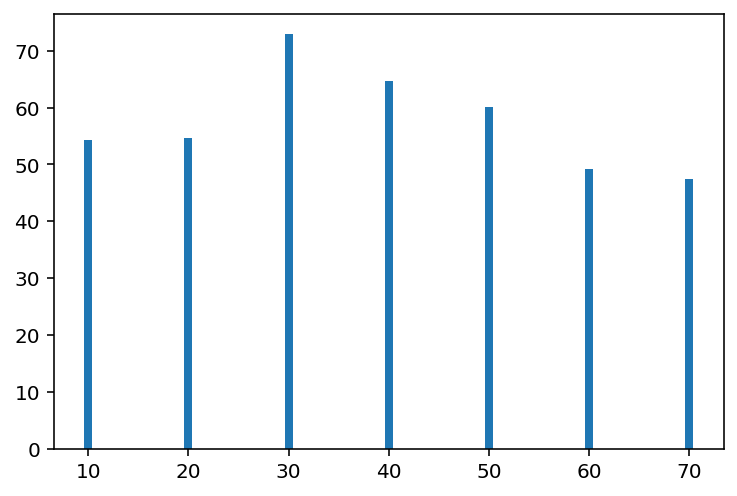

In [117]:
# 시각화
plt.bar(age_mean['Age_Group'], age_mean['Income'])
plt.show()


#### 실습B-4. 남녀별 집계

- 남녀(Gender)별 연수입(Income) 평균을 집계하여 gender_mean 데이터프레임으로 선언하고 확인합니다.

In [118]:
# 남녀별 집계
gender_mean = mall.groupby(by = 'Gender', as_index = False )['Income'].mean()

# 확인
gender_mean.head()

,Gender,Income
0,Female,60.783019
1,Male,64.012195


#### 실습B-5. 정렬해서 확인

- Score 열을 기준으로 내림차순 정렬한 후 상위 20개 행만 추축해 score_top20 데이터프레임으로 선언하고 확인합니다.

In [119]:
# Score Top 20

score_top20 = mall.sort_values(by = 'Score', ascending = False).head(20)
score_top20.reset_index(drop = True, inplace = True )
# 확인
score_top20.head()

,Gender,Age,Income,Score,Age_Group
0,Female,35.0,19.0,99,30.0
1,Female,35.0,23.0,98,30.0
2,Male,28.0,77.0,97,20.0
3,Male,30.0,99.0,97,30.0
4,Female,33.0,86.0,95,30.0


#### 실습B-6. 고객 그룹핑

- 다음 기준으로 고객 등급을 갖는 Level열을 **mall** 데이터프레임에 추가합니다.
    - 70 < Score : A
    - 50 < Score <= 70: B
    - 30 < Score <= 50: C
    - Score <= 30: D


In [120]:
# 등급 구하기

my_bin = [-np.inf,  30, 50, 70, np.inf] # -np.inf 마이너스 무한대/ 경계값은 왼쪾에 포함 
label = ['D', 'C', 'B', 'A']
mall['Level'] = pd.cut(  mall['Score'] , bins = my_bin  , labels = label )

# 확인
mall.head()

,Gender,Age,Income,Score,Age_Group,Level
0,Male,19.0,15.0,39,10.0,C
1,Female,20.0,16.0,6,20.0,D
2,Female,22.0,17.0,76,20.0,A
3,Female,23.0,18.0,94,20.0,A
4,Male,64.0,19.0,3,60.0,D


#### 실습B-7. 등급별 집계

- 앞의 과정에서 추가한 등급(Level)별 연수입(Income) 평균을 집계합니다.

In [121]:
# 등급별 연수입 평균
tmp = mall.groupby(by = 'Level', as_index = False)['Income'].mean()
tmp

,Level,Income
0,D,71.046512
1,C,55.464286
2,B,55.923077
3,A,67.000000
